# MSiA 400 - Final Project
## INITITAL EDA: TRNSACT Table
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Chen

This file shows our EDA for the SKUINFO & DEPTINFO tables on the original dataset (i.e. before cleaning).

NOTE: To upload the data into Postgress database, we did some cleanning directly on the terminal. See *Clean_SKUINFO_TRNSACT* file for the corresponding code.

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# --- Variables on File---

# Connection to db 
USER = "YOUR USER HERE"
PSWD = "YOUR PASSWORD HERE"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "2022-everything-team12"

### Connect to database

In [3]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



The trnsact database has 120,916,889 of observations. Thus, to do the EDA on this data we will extract 10,000,000 observations randomly. 

In [4]:
# Retrive a sample of the data
df = pd.read_sql("select * from \"TRNSACT\"order by random() LIMIT 10000000", connection);
df

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,INTID,MIC,EXTRACOL
0,2366897,2207,840,03500,0,2005-04-02,P,1,18.50,18.50,763100052,281,0
1,5679400,4803,340,02500,0,2005-07-08,P,1,65.00,39.99,610500091,205,0
2,9026638,3307,450,02200,741904644,2004-10-02,P,1,22.00,22.00,819700285,025,0
3,1439165,9103,571,05400,762005701,2005-08-25,P,1,78.00,27.30,349500126,386,0
4,7449,3704,350,00900,0,2005-03-15,P,1,17.99,4.50,316300049,035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,3681414,7603,430,00500,0,2005-08-07,P,1,5.00,5.00,303900014,452,0
9999996,8961313,8302,750,19700,0,2005-02-25,P,1,24.00,2.99,968100020,542,0
9999997,2313514,1302,390,01000,0,2005-05-17,P,1,16.00,16.00,948300011,643,0
9999998,8109699,1009,310,01700,46308651,2005-04-07,P,1,59.00,59.00,468800072,400,0


In [5]:
# Close connection to db
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


PostgreSQL connection is closed


### Analyzing TRNSACT table

In [20]:
# Print head and tail of table
df

In [21]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   SKU        int64  
 1   STORE      int64  
 2   REGISTER   int64  
 3   TRANNUM    object 
 4   SEQ        int64  
 5   SALEDATE   object 
 6   STYPE      object 
 7   QUANTITY   int64  
 8   ORIGPRICE  float64
 9   AMT        float64
 10  INTID      int64  
 11  MIC        object 
 12  EXTRACOL   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 991.8+ MB


In [23]:
# Check percentage of missing values per column
df.isnull().sum()/df.shape[0]*100

SKU          0.0
STORE        0.0
REGISTER     0.0
TRANNUM      0.0
SEQ          0.0
SALEDATE     0.0
STYPE        0.0
QUANTITY     0.0
ORIGPRICE    0.0
AMT          0.0
INTID        0.0
MIC          0.0
EXTRACOL     0.0
dtype: float64

There are no missing values in the TRNSACT table. 

In [24]:
# Summary statistics
df.describe()

,SKU,STORE,REGISTER,SEQ,QUANTITY,ORIGPRICE,AMT,INTID,EXTRACOL
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,4.973996e+06,4.441678e+03,4.003537e+02,1.902124e+08,1.0,3.678297e+01,2.462695e+01,4.993213e+08,2.108040e-02
std,2.836246e+06,2.846769e+03,2.530983e+02,3.007716e+08,0.0,4.036648e+01,2.723523e+01,2.884846e+08,1.436524e-01
min,3.000000e+00,1.020000e+02,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,2.631188e+06,2.103000e+03,1.900000e+02,0.000000e+00,1.0,1.600000e+01,9.930000e+00,2.495000e+08,0.000000e+00
50%,4.859209e+06,4.103000e+03,3.700000e+02,0.000000e+00,1.0,2.800000e+01,1.800000e+01,4.987001e+08,0.000000e+00
75%,7.393222e+06,7.102000e+03,5.800000e+02,3.424088e+08,1.0,4.800000e+01,3.100000e+01,7.494000e+08,0.000000e+00
max,9.999997e+06,9.909000e+03,9.930000e+02,9.999100e+08,1.0,1.200000e+03,1.200000e+03,9.999004e+08,1.000000e+00


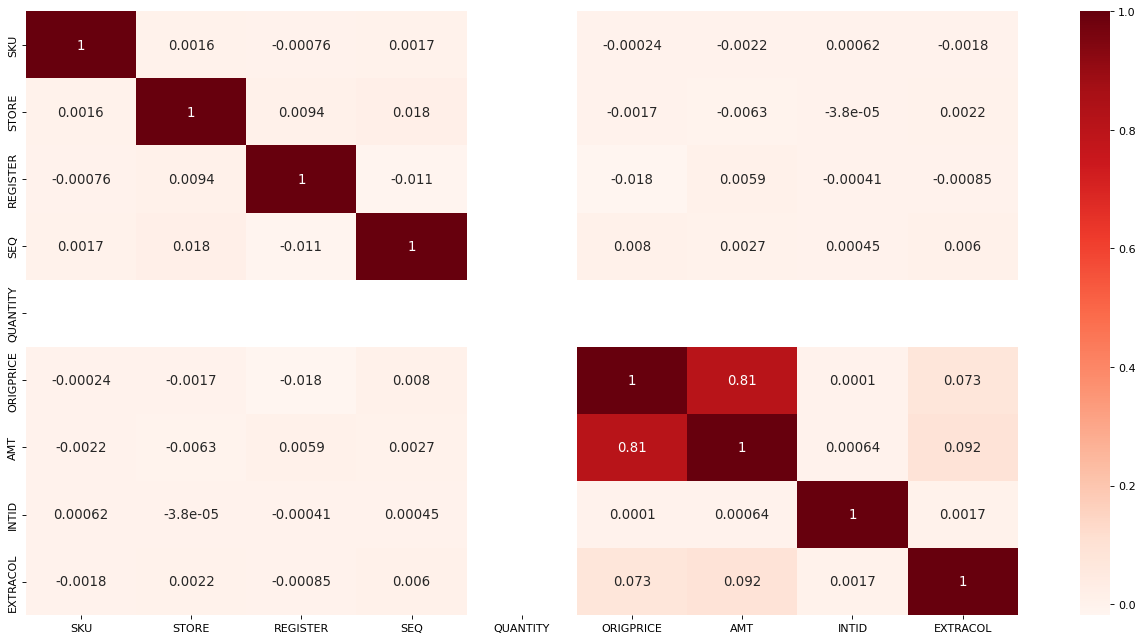

In [16]:
# Correlation matrix
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(df_trnsact.corr(), annot=True, cmap = 'Reds', 
            annot_kws={"fontsize":12})
plt.show()

#### SKU

#### STORE

#### REGISTER

#### TRANNUM

#### SALEDATE

#### SEQ

#### INTERID

#### STYPE

#### QUANTITY

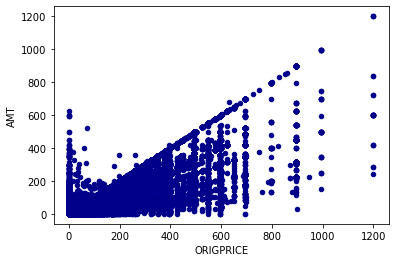

In [29]:
ax = df.plot.scatter(x = 'ORIGPRICE',
                      y = 'AMT',
                      c = 'DarkBlue')

<AxesSubplot:ylabel='Frequency'>

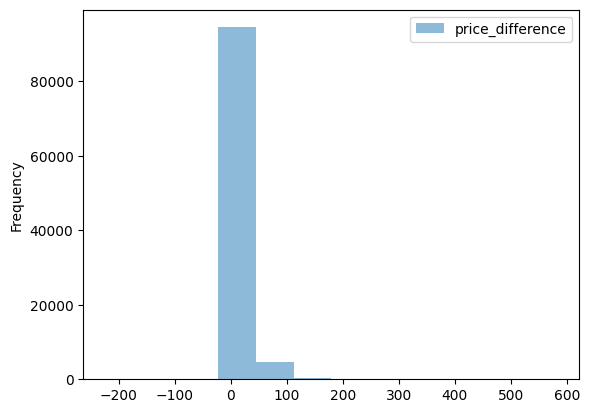

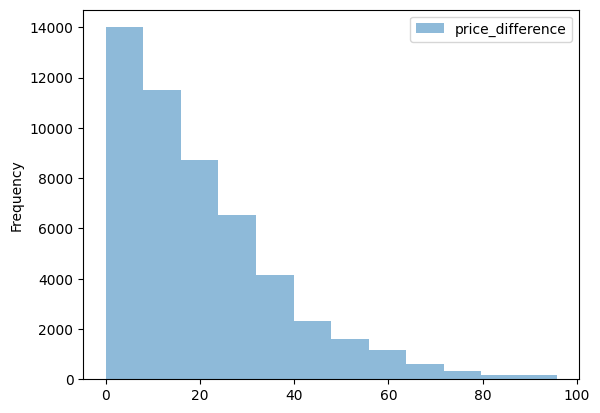

In [7]:

df_trnsact[['price_difference']].plot.hist(bins=12, alpha=0.5)
def filter_outlier(df, column):
    q_low = df[column].quantile(0.01)
    q_hi  = df[column].quantile(0.99)
    df_filtered = df[(df[column] < q_hi) & (df[column] > q_low)]
    return df_filtered
df_filtered = filter_outlier(df_trnsact, 'price_difference')
df_filtered[['price_difference']].plot.hist(bins=12, alpha=0.5)

